# Credit Scoring PD (probability of default) Model

## Preprocessing

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('credit_score.csv')
data.head()

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,TypeofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
0,0x1602,CUS0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,809.98,26.822620,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good
1,0x1603,CUS0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,809.98,31.944960,No,49.574949,118.280222,LowspentLargevaluepayments,284.629163,Good
2,0x1604,CUS0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,NaN,4.0,809.98,28.609352,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good
3,0x1605,CUS0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,809.98,31.377862,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good
4,0x1606,CUS0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,809.98,24.797347,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good


In [3]:
data.describe(include = 'all')

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,TypeofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
count,87495,87495,87495,78779,87495.000000,87495,81317,8.749500e+04,74319.000000,87495.000000,87495.000000,87495.000000,87495.000000,77583,87495.000000,81400.000000,85654.000000,85789.000000,87495.000000,87495.000000,87495,87495.000000,79786.000000,87495,86437.000000,87495
unique,87495,12500,8,10139,NaN,12501,15,NaN,NaN,NaN,NaN,NaN,NaN,6260,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,7,NaN,3
top,0x1602,CUS0xd40,January,Langep,NaN,#F%$D@*&8,Lawyer,NaN,NaN,NaN,NaN,NaN,NaN,Not Specified,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,LowspentSmallvaluepayments,NaN,Standard
freq,1,8,10970,41,NaN,4857,5762,NaN,NaN,NaN,NaN,NaN,NaN,1208,NaN,NaN,NaN,NaN,NaN,NaN,45810,NaN,NaN,22237,NaN,46651
mean,NaN,NaN,NaN,NaN,110.467364,NaN,NaN,1.802404e+05,4193.181285,17.112646,22.664792,73.050871,7.019841,NaN,21.060403,30.904324,10.385851,27.734302,1426.716635,32.290526,NaN,1388.517947,195.482486,NaN,402.281023,NaN
std,NaN,NaN,NaN,NaN,686.549658,NaN,NaN,1.455212e+06,3179.195651,117.428586,129.806747,467.727237,60.352339,NaN,14.864558,225.495250,6.776714,193.011903,1155.824064,5.112418,NaN,8248.832131,199.357752,NaN,213.309331,NaN
min,NaN,NaN,NaN,NaN,-500.000000,NaN,NaN,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,0.000000,NaN,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,NaN,0.000000,0.000000,NaN,0.007760,NaN
25%,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,1.943348e+04,1626.677917,3.000000,4.000000,8.000000,1.000000,NaN,10.000000,9.000000,5.340000,3.000000,566.400000,28.059063,NaN,30.453014,72.220853,NaN,270.107156,NaN
50%,NaN,NaN,NaN,NaN,33.000000,NaN,NaN,3.757975e+04,3095.905000,6.000000,5.000000,13.000000,3.000000,NaN,18.000000,14.000000,9.410000,6.000000,1166.230000,32.322206,NaN,69.285581,128.921405,NaN,336.698600,NaN
75%,NaN,NaN,NaN,NaN,42.000000,NaN,NaN,7.288608e+04,5967.930000,7.000000,7.000000,20.000000,5.000000,NaN,28.000000,18.000000,14.840000,9.000000,1948.980000,36.495606,NaN,161.405543,236.802042,NaN,470.180816,NaN


In [4]:
data = data.drop(['ID', 'CustomerID', 'Name',  'SSN', 'TypeofLoan'], axis = 1)

In [5]:
data['target'] = np.where(data['CreditScore'] == 'Poor', 1, 0)

In [6]:
data['target'].value_counts()

target
0    62145
1    25350
Name: count, dtype: int64

In [7]:
data.isnull().sum()

Month                         0
Age                           0
Occupation                 6178
AnnualIncome                  0
MonthlyInhandSalary       13176
NumBankAccounts               0
NumCreditCard                 0
InterestRate                  0
NumofLoan                     0
Delayfromduedate              0
NumofDelayedPayment        6095
ChangedCreditLimit         1841
NumCreditInquiries         1706
OutstandingDebt               0
CreditUtilizationRatio        0
PaymentofMinAmount            0
TotalEMIpermonth              0
Amountinvestedmonthly      7709
PaymentBehaviour              0
MonthlyBalance             1058
CreditScore                   0
target                        0
dtype: int64

In [8]:
for i in data.columns:
    if data[i].dtypes == object:
        data[i].fillna(data[i].mode()[0], inplace = True)
    else:
        data[i].fillna(data[i].mean(), inplace = True)

C:\Users\Chaos\AppData\Local\Temp\ipykernel_17072\2012181578.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[i].fillna(data[i].mode()[0], inplace = True)
C:\Users\Chaos\AppData\Local\Temp\ipykernel_17072\2012181578.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [9]:
data.isnull().sum()

Month                     0
Age                       0
Occupation                0
AnnualIncome              0
MonthlyInhandSalary       0
NumBankAccounts           0
NumCreditCard             0
InterestRate              0
NumofLoan                 0
Delayfromduedate          0
NumofDelayedPayment       0
ChangedCreditLimit        0
NumCreditInquiries        0
OutstandingDebt           0
CreditUtilizationRatio    0
PaymentofMinAmount        0
TotalEMIpermonth          0
Amountinvestedmonthly     0
PaymentBehaviour          0
MonthlyBalance            0
CreditScore               0
target                    0
dtype: int64

In [10]:
for var in data.columns:
    if var == 'target':
        continue  

    if data[var].dtypes != object:
        
        q1 = data[var].quantile(0.25)
        q2 = data[var].quantile(0.5)
        q3 = data[var].quantile(0.75)

        ranges = [-np.inf, q1, q2, q3, np.inf]
        data['category_' + var] = pd.cut(data[var], bins = ranges, duplicates = 'drop')

        grouped = data.groupby(['category_' + var, 'target'])['target'].count().unstack().reset_index()

        grouped['positive_prop'] = grouped[0] / grouped[0].sum()
        grouped['negative_prop'] = grouped[1] / grouped[1].sum()

        grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])

        grouped.rename(columns = {'woe': var + '_woe'}, inplace = True)
        data = data.merge(grouped[['category_' + var, var + '_woe']], how = 'left', on = 'category_' + var)

    elif data[var].dtypes == object:

        grouped = data.groupby([var, 'target'])['target'].count().unstack().reset_index()

        grouped['positive_prop'] = grouped[0] / grouped[0].sum()
        grouped['negative_prop'] = grouped[1] / grouped[1].sum()

        grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])

        grouped.rename(columns={'woe': var + '_woe'}, inplace = True)
        data = data.merge(grouped[[var, var + '_woe']], how = 'left', on = var)

C:\Users\Chaos\AppData\Local\Temp\ipykernel_17072\1329015088.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(['category_' + var, 'target'])['target'].count().unstack().reset_index()
C:\Users\Chaos\AppData\Local\Temp\ipykernel_17072\1329015088.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(['category_' + var, 'target'])['target'].count().unstack().reset_index()
C:\Users\Chaos\AppData\Local\Temp\ipykernel_17072\1329015088.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass obser

In [11]:
from scipy import stats


for i in data.columns:
    
    if data[i].dtype in ['int64', 'float64']:
        
        kstest_statistic, kstest_p_value = stats.kstest(data[i], 'norm')
        
        print(f'Column: {i}')
        print(f'Kolmogorov-Smirnov Test:')
        print(f'Test Statistic: {kstest_statistic}')
        print(f'p-value: {kstest_p_value}')
        
        if kstest_p_value > 0.05:
            print('Data looks normally distributed')
            print()
        else:
            print('Data does not look normally distributed')
            print()

Column: Age
Kolmogorov-Smirnov Test:
Test Statistic: 0.9904794559689125
p-value: 0.0
Data does not look normally distributed

Column: AnnualIncome
Kolmogorov-Smirnov Test:
Test Statistic: 1.0
p-value: 0.0
Data does not look normally distributed

Column: MonthlyInhandSalary
Kolmogorov-Smirnov Test:
Test Statistic: 1.0
p-value: 0.0
Data does not look normally distributed

Column: NumBankAccounts
Kolmogorov-Smirnov Test:
Test Statistic: 0.889153405396812
p-value: 0.0
Data does not look normally distributed

Column: NumCreditCard
Kolmogorov-Smirnov Test:
Test Statistic: 0.9558429305125329
p-value: 0.0
Data does not look normally distributed

Column: InterestRate
Kolmogorov-Smirnov Test:
Test Statistic: 0.9505969164545867
p-value: 0.0
Data does not look normally distributed

Column: NumofLoan
Kolmogorov-Smirnov Test:
Test Statistic: 0.724195407796949
p-value: 0.0
Data does not look normally distributed

Column: Delayfromduedate
Kolmogorov-Smirnov Test:
Test Statistic: 0.953961834067347
p-va

In [12]:
def target_correlation(data, target, threshold = 0.1):
    
    woe_features = data.filter(regex='_woe$', axis=1)
    woe_features[target] = data[target] 
    
    corr_matrix = woe_features.corr(method='spearman')
    
    target_correlations = corr_matrix[target].abs() > threshold
    
    variables_explaining_target = target_correlations[target_correlations].index.tolist()

    variables_explaining_target.remove(target)
    
    result_explaining_target = pd.DataFrame(
    {'Variable': variables_explaining_target,
    'Correlation with Target': corr_matrix.loc[variables_explaining_target, target]})
    
    result_explaining_target.reset_index(drop = True, inplace = True)
    
    return result_explaining_target


target_result = target_correlation(data, 'target')

target_result

C:\Users\Chaos\AppData\Local\Temp\ipykernel_17072\315481558.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  woe_features[target] = data[target]


,Variable,Correlation with Target
0,Age_woe,-0.102439
1,AnnualIncome_woe,-0.199462
2,MonthlyInhandSalary_woe,-0.174459
3,NumBankAccounts_woe,-0.262026
4,NumCreditCard_woe,-0.314837
5,InterestRate_woe,-0.406848
6,NumofLoan_woe,-0.287626
7,Delayfromduedate_woe,-0.338427
8,NumofDelayedPayment_woe,-0.222047
9,NumCreditInquiries_woe,-0.360778


In [13]:
def intercorrelation(data, target, threshold = 0.7):
    
    woe_features = data.filter(regex = '_woe$', axis = 1) 
    
    corr_matrix = woe_features.corr(method = 'spearman')
    
    highly_correlated_variables = (np.abs(corr_matrix) > threshold) & (corr_matrix != 1.0)
    
    independent_variable_pairs = np.where(highly_correlated_variables)
    
    correlated_pairs_set = set()
   
    for var1, var2 in zip(independent_variable_pairs[0], independent_variable_pairs[1]):

        if var1 < var2:
            correlated_pairs_set.add((corr_matrix.index[var1], corr_matrix.columns[var2]))
        else:
            correlated_pairs_set.add((corr_matrix.index[var2], corr_matrix.columns[var1]))
            
    
    result_intercorrelated_independent = pd.DataFrame(list(correlated_pairs_set), columns=['Variable 1', 'Variable 2'])
    
    return result_intercorrelated_independent

intercorrelated_result = intercorrelation(data, 'target')
intercorrelated_result

,Variable 1,Variable 2
0,AnnualIncome_woe,MonthlyInhandSalary_woe


In [14]:
target_result.Variable.tolist()

['Age_woe',
 'AnnualIncome_woe',
 'MonthlyInhandSalary_woe',
 'NumBankAccounts_woe',
 'NumCreditCard_woe',
 'InterestRate_woe',
 'NumofLoan_woe',
 'Delayfromduedate_woe',
 'NumofDelayedPayment_woe',
 'NumCreditInquiries_woe',
 'OutstandingDebt_woe',
 'PaymentofMinAmount_woe',
 'PaymentBehaviour_woe',
 'MonthlyBalance_woe']

In [15]:
inputs = data[['Age_woe',
 'AnnualIncome_woe',
 'MonthlyInhandSalary_woe',
 'NumBankAccounts_woe',
 'NumCreditCard_woe',
 'InterestRate_woe',
 'NumofLoan_woe',
 'Delayfromduedate_woe',
 'NumofDelayedPayment_woe',
 'NumCreditInquiries_woe',
 'OutstandingDebt_woe',
 'PaymentofMinAmount_woe',
 'PaymentBehaviour_woe',
 'MonthlyBalance_woe']]

output = data['target']

## Modeling

In [16]:
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size = 0.3, random_state = 42)

In [17]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score

def evaluate(model, X_train, y_train, X_test, y_test):
    
    '''Predictions and probabilities for the training set'''
    
    y_train_pred = model.predict(X_train)
    y_train_prob = model.predict_proba(X_train)[:, 1]

    '''Predictions and probabilities for the test set'''
    
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1]

    '''Calculate metrics for the training set''' 
    
    roc_train_prob = roc_auc_score(y_train, y_train_prob)
    gini_train_prob = roc_train_prob * 2 - 1
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)

    '''Calculate metrics for the test set'''
    
    roc_test_prob = roc_auc_score(y_test, y_test_prob)
    gini_test_prob = roc_test_prob * 2 - 1
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)

    results = pd.DataFrame({
        'Dataset': ['Train', 'Test'],
        'Gini': [gini_train_prob * 100, gini_test_prob * 100],
        'Precision': [precision_train, precision_test],
        'Recall': [recall_train, recall_test]
    })

    confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    
    return results , confusion_matrix

In [18]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [19]:
evaluate(clf, X_train, y_train, X_test, y_test)

(  Dataset       Gini  Precision    Recall
 0   Train  59.412159   0.636006  0.566932
 1    Test  58.741700   0.628088  0.558082,
 array([[16067,  2529],
        [ 3382,  4271]], dtype=int64))

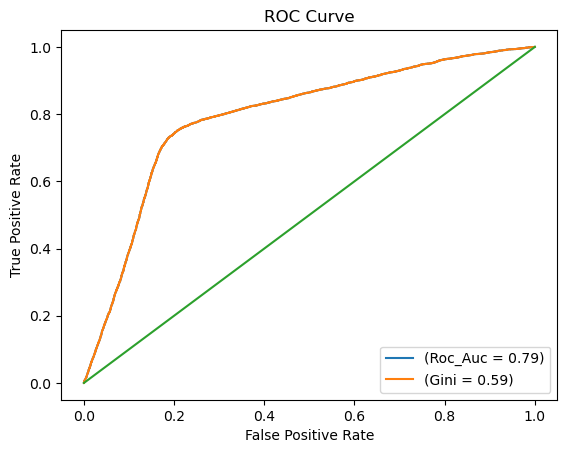

In [20]:
y_prob = clf.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

## Univariate analysis of Gini

In [21]:
variables = []
train_gini_scores = []
test_gini_scores = []


for i in X_train.columns:
    X_train_single_var = X_train[[i]]
    X_test_single_var = X_test[[i]]

    
    clf.fit(X_train_single_var, y_train)
    
    y_pred_train_single_var = clf.predict_proba(X_train_single_var)[:, 1]

    train_roc = roc_auc_score(y_train, y_pred_train_single_var)
    train_gini = 2 * train_roc - 1

    
    y_pred_test_single_var = clf.predict_proba(X_test_single_var)[:, 1]

    test_roc = roc_auc_score(y_test, y_pred_test_single_var)
    test_gini = 2 * test_roc - 1


    variables.append(i)
    train_gini_scores.append(train_gini)
    test_gini_scores.append(test_gini)


results_df = pd.DataFrame({
                            'Variable': variables,
                            'Train Gini': train_gini_scores,
                            'Test Gini': test_gini_scores
                        })

results_df_sorted = results_df.sort_values(by = 'Test Gini', ascending = False)

pd.options.display.float_format = '{:.4f}'.format

results_df_sorted

,Variable,Train Gini,Test Gini
10,OutstandingDebt_woe,0.5153,0.5117
5,InterestRate_woe,0.5002,0.5011
9,NumCreditInquiries_woe,0.4459,0.4376
7,Delayfromduedate_woe,0.4229,0.4030
4,NumCreditCard_woe,0.3885,0.3752
6,NumofLoan_woe,0.3542,0.3531
3,NumBankAccounts_woe,0.3173,0.3229
11,PaymentofMinAmount_woe,0.3041,0.2976
8,NumofDelayedPayment_woe,0.2730,0.2740
1,AnnualIncome_woe,0.2478,0.2412


## Training new model using selected variables (Test Gini > 40%)

In [22]:
filtered_df = results_df_sorted[results_df_sorted['Test Gini'] > 0.4]['Variable'].tolist()

filtered_df

['OutstandingDebt_woe',
 'InterestRate_woe',
 'NumCreditInquiries_woe',
 'Delayfromduedate_woe']

In [23]:
inputs_uni = data[['OutstandingDebt_woe',
 'InterestRate_woe',
 'NumCreditInquiries_woe',
 'Delayfromduedate_woe']]

output = data['target']

In [24]:
X_train_uni, X_test_uni, y_train_uni, y_test_uni = train_test_split(inputs_uni, output, test_size = 0.3, random_state = 42)

In [25]:
clf_uni = LogisticRegression()
clf_uni.fit(X_train_uni, y_train_uni)

LogisticRegression()

In [26]:
evaluate(clf_uni, X_train_uni, y_train_uni, X_test_uni, y_test_uni)

(  Dataset    Gini  Precision  Recall
 0   Train 56.6131     0.6300  0.5831
 1    Test 55.9434     0.6268  0.5809,
 array([[15949,  2647],
        [ 3207,  4446]], dtype=int64))

## Deployment

In [27]:
prod_data = pd.read_excel('prod_data_with_woe.xlsx')

prod_data

,Unnamed: 0,Age_woe,AnnualIncome_woe,MonthlyInhandSalary_woe,NumBankAccounts_woe,NumCreditCard_woe,InterestRate_woe,NumofLoan_woe,Delayfromduedate_woe,NumofDelayedPayment_woe,NumCreditInquiries_woe,OutstandingDebt_woe,MonthlyBalance_woe,PaymentofMinAmount_woe,PaymentBehaviour_woe
0,66072,-0.1156,0.6777,0.6042,0.3233,0.0409,-0.0280,-0.1058,-1.0948,0.3325,1.1029,-0.3521,0.6836,0.9738,0.3910
1,6931,-0.1156,0.2314,-0.4757,0.3233,0.0409,-0.0280,0.3208,-0.1009,-0.2813,0.5585,-0.3521,-0.2370,-0.4725,-0.0706
2,3064,-0.0589,-0.1881,0.1639,0.7752,0.0409,-1.3762,0.9065,1.0508,0.6511,0.5585,-0.3521,0.6836,0.9738,0.1827
3,9134,-0.2219,0.2314,0.1639,-0.7832,-1.2249,-0.0280,0.3208,0.4968,0.3325,-1.0683,-1.2232,-0.4900,-0.4725,-0.3158
4,47254,-0.1156,-0.1881,-0.1572,-0.7832,0.0409,-1.3762,-0.1058,-1.0948,-0.6423,-0.4761,-1.2232,0.6836,-0.0110,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,52892,-0.2219,0.2314,-0.1572,-0.3802,-1.2249,-0.0280,-0.1058,-1.0948,-0.6423,-1.0683,-1.2232,0.2145,-0.4725,-0.3158
796,53553,0.4878,-0.1881,0.1639,0.3233,-0.0785,0.9632,0.3208,1.0508,-0.2813,1.1029,-0.3521,0.2145,-0.0110,0.3910
797,39282,-0.2219,-0.1881,-0.1572,-0.7832,-0.0785,-1.3762,-0.9635,-1.0948,-0.6423,-0.4761,-1.2232,-0.2370,-0.4725,-0.0034
798,53283,-0.0589,-0.5447,-0.4757,0.3233,-1.2249,-0.0280,0.9065,-0.1009,-0.2813,-0.4761,-1.2232,-0.4900,-0.0110,-0.3158


In [28]:
prod_data.rename(columns = {'Unnamed: 0': 'ID'}, inplace = True)

In [29]:
prod_inputs = prod_data[['ID',
 'OutstandingDebt_woe',
 'InterestRate_woe',
 'NumCreditInquiries_woe',
 'Delayfromduedate_woe']]

prod_inputs

,ID,OutstandingDebt_woe,InterestRate_woe,NumCreditInquiries_woe,Delayfromduedate_woe
0,66072,-0.3521,-0.0280,1.1029,-1.0948
1,6931,-0.3521,-0.0280,0.5585,-0.1009
2,3064,-0.3521,-1.3762,0.5585,1.0508
3,9134,-1.2232,-0.0280,-1.0683,0.4968
4,47254,-1.2232,-1.3762,-0.4761,-1.0948
...,...,...,...,...,...
795,52892,-1.2232,-0.0280,-1.0683,-1.0948
796,53553,-0.3521,0.9632,1.1029,1.0508
797,39282,-1.2232,-1.3762,-0.4761,-1.0948
798,53283,-1.2232,-0.0280,-0.4761,-0.1009


In [30]:
prod_inputs['PD'] = clf_uni.predict_proba(prod_inputs.iloc[:,1:])[:,1]
prod_inputs

C:\Users\Chaos\AppData\Local\Temp\ipykernel_17072\3872838907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_inputs['PD'] = clf_uni.predict_proba(prod_inputs.iloc[:,1:])[:,1]


,ID,OutstandingDebt_woe,InterestRate_woe,NumCreditInquiries_woe,Delayfromduedate_woe,PD
0,66072,-0.3521,-0.0280,1.1029,-1.0948,0.3352
1,6931,-0.3521,-0.0280,0.5585,-0.1009,0.3050
2,3064,-0.3521,-1.3762,0.5585,1.0508,0.3587
3,9134,-1.2232,-0.0280,-1.0683,0.4968,0.4700
4,47254,-1.2232,-1.3762,-0.4761,-1.0948,0.6796
...,...,...,...,...,...,...
795,52892,-1.2232,-0.0280,-1.0683,-1.0948,0.5838
796,53553,-0.3521,0.9632,1.1029,1.0508,0.1512
797,39282,-1.2232,-1.3762,-0.4761,-1.0948,0.6796
798,53283,-1.2232,-0.0280,-0.4761,-0.1009,0.4729
